In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import time
from os import listdir

In [3]:
# Load speaker attributes from Google Drive
speaker_attributes = pd.read_parquet('/content/drive/MyDrive/ADA/Project datasets/speaker_attributes.parquet', columns=['nationality','party','id'])
speaker_attributes.shape

(9055981, 3)

In [5]:
# Load dataset containing sport quotes
dataset = pd.read_csv('/content/drive/MyDrive/ADA/ada-sports-quotes/sport-quotes-2018.csv.bz2', compression='bz2')
dataset.shape

(4274811, 10)

In [6]:
dataset.sample(3)

,Unnamed: 0,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
1294471,8238614,2018-09-03-048935,Our president and sports director did everythi...,Hein Vanhaezebrouck,['Q2222953'],2018-09-03 00:00:00,115,"[['Hein Vanhaezebrouck', '0.8695'], ['None', '...",['http://au.eurosport.com/football/lazar-marko...,E
3464157,22061102,2018-06-28-058964,It's five years since Cavan last won two Champ...,None,[],2018-06-28 01:00:00,2,"[['None', '0.8782'], ['Ciaran Whelan', '0.0639...",['http://www.irishnews.com/sport/gaafootball/2...,E
3829426,24397502,2018-04-19-009374,"And Woodstown, that first start, he was amazin...",Luke Smith,"['Q13512824', 'Q16233583', 'Q16853339', 'Q1704...",2018-04-19 14:59:45,1,"[['Luke Smith', '0.8046'], ['None', '0.1954']]",['http://www.courierpostonline.com/story/sport...,E


In [7]:
# Removing square brackets and quotation marks from qids to match the speaker_attributes dataset
dataset['qids'] = dataset['qids'].str.strip('[\'\']')
speakers = speaker_attributes[speaker_attributes['id'].isin(dataset['qids'])]

In [8]:
# Removing speakers without any known party
politicians = speakers[~(speakers['party'].isna())]
politicians.shape

(7097, 3)

In [9]:
# Load the database relating qids with wikidata labels
qid_labels = pd.read_csv('/content/drive/MyDrive/ADA/Project datasets/wikidata_labels_descriptions_quotebank.csv.bz2', compression='bz2', index_col='QID')

In [10]:
############# A DISCUTER ################################

# Only keeping the first qid in the party feature
politicians_1_qid = politicians['party'].str.get(0)
politicians_1_qid.shape

(7097,)

In [11]:
# Counts the occurences of each party and merging the corresponding label
party_counts_1_qid = pd.DataFrame(pd.value_counts(politicians_1_qid))
party_counts_label_1_qid = party_counts_1_qid.merge(qid_labels, left_index=True, right_on='QID').rename(columns={'party': 'count'})
party_counts_label_1_qid.head(3)

,count,Label,Description
QID,,,
Q29468,1548,Republican Party,major political party in the United States
Q29552,1505,Democratic Party,political party in the United States
Q9630,219,Labour Party,political party in the United Kingdom


In [12]:
# Setting label of party with count lower than the .99 quantile to 'Others'
threshold_value = party_counts_label_1_qid['count'].quantile(.99)
values_below_thresh = party_counts_label_1_qid['count'] < threshold_value
party_counts_label_1_qid.loc[values_below_thresh,'Label'] = 'Others'

# Plots : pie plot and bar plot

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f89048c2690>],
      dtype=object)

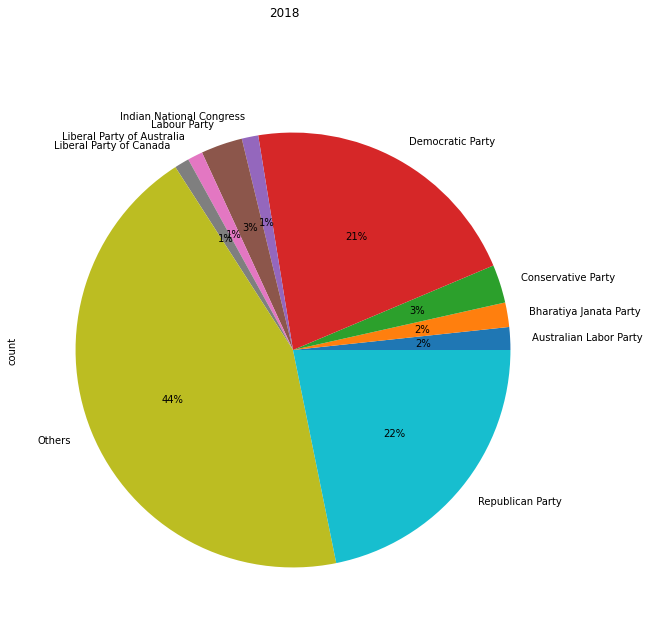

In [13]:
party_counts_label_1_qid.groupby('Label').sum().plot(kind='pie', subplots=True, figsize=(10, 10), legend=False, autopct='%1.f%%', title='2018')

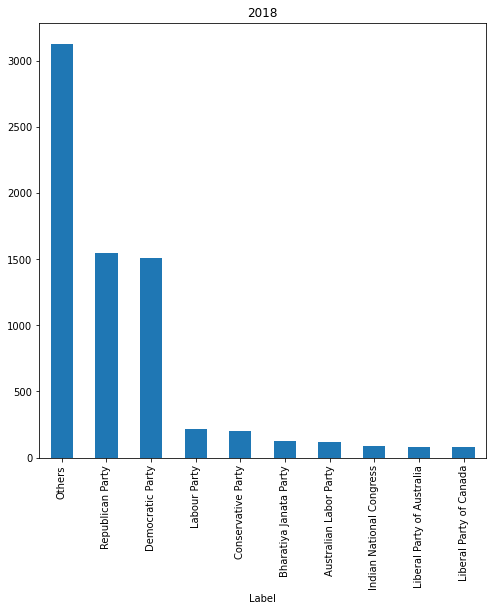

In [14]:
party_counts_label_1_qid.groupby('Label').sum().sort_values(by='count', ascending=False).plot(kind='bar',legend=False, figsize=(8, 8), log=False, title='2018')